- Capstone EDA presentation - https://goo.gl/ffF3jB
- Kaggle kernel - https://www.kaggle.com/chuahanen/toxic-eda-meta-features-sentiments-tf-idf

In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
rtrain = pd.read_csv('./datasets/all/train.csv')
rtest= pd.read_csv('./datasets/all/test.csv')

In [12]:
# quick look at dataset
rtrain.head(7)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0


#### we see that a comment can have multiple labels
</br>

In [6]:
# splitting dataset into X and y subsets
yraw = rtrain.iloc[:, 2:]
Xraw = rtrain.iloc[:,:2]

In [8]:
# adding 2 columns to target variables for EDA 
yraw['is_dirty'] = yraw.apply(max, axis=1)
yraw['sum'] = yraw.apply(sum, axis=1)

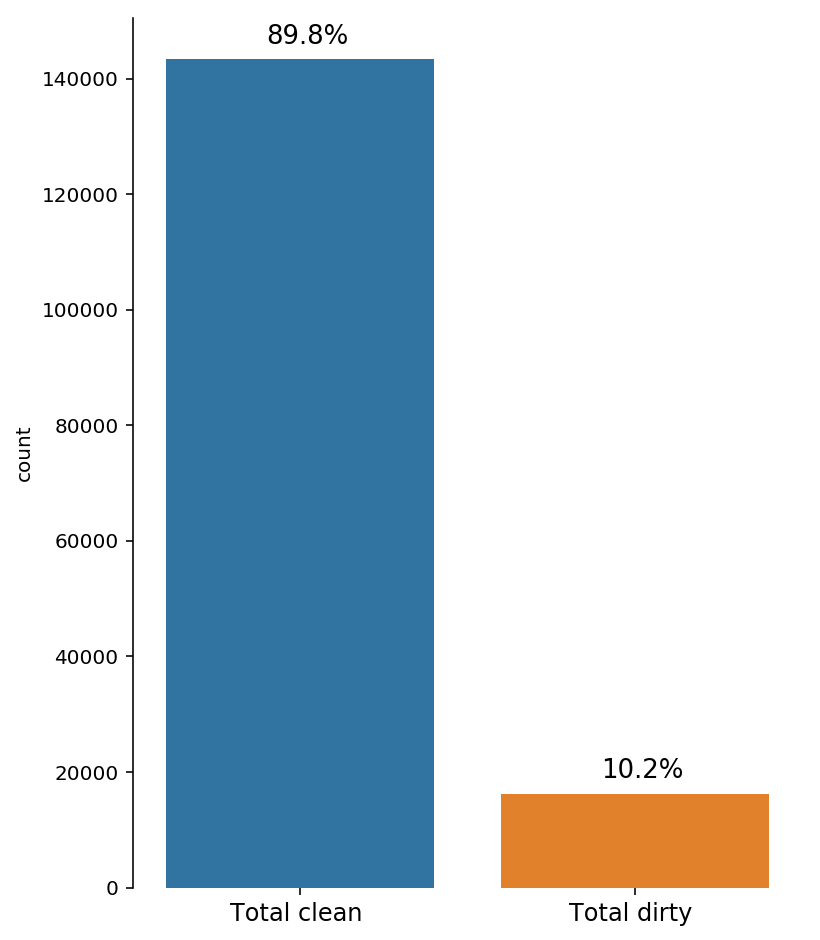

In [8]:
# checking for class imbalance (clean vs dirty)
plt.figure(figsize=(6, 8))
ax = sns.countplot(yraw['is_dirty'])
ax.set_xticklabels(['Total clean ', 'Total dirty '],fontsize=12)
sns.despine(bottom=True)
ax.set_xlabel('')
ax.text(-0.10 , 146000, str(round(yraw['is_dirty'].value_counts()[0]/len(yraw)*100,1))+'%',fontsize=13)
ax.text(0.90 , 19000, str(round(yraw['is_dirty'].value_counts()[1]/len(yraw)*100,1))+'%',fontsize=13)
plt.show()

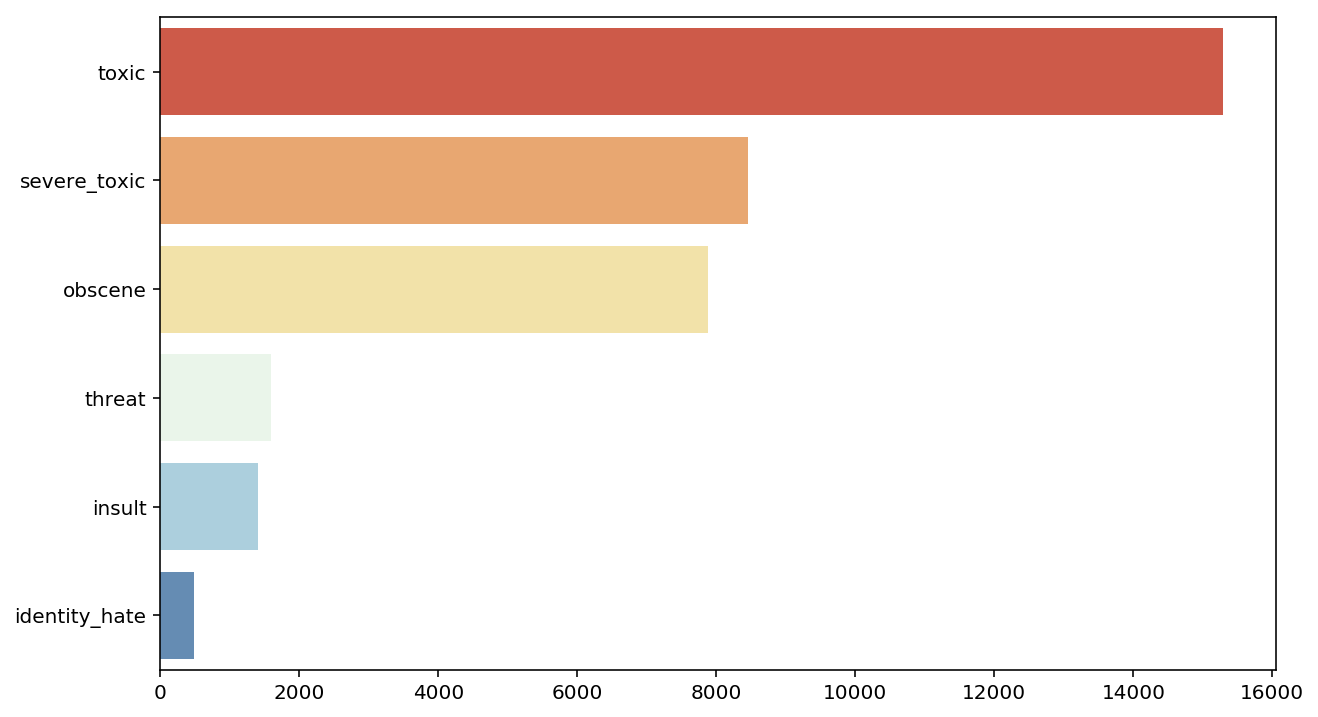

In [9]:
# checking distribution of dirty comments
plt.figure(figsize=(10, 6))
sns.barplot(x=yraw.iloc[:, :6].apply(sum).sort_values(ascending=False), y=yraw.iloc[:, :6].columns, palette='RdYlBu')
plt.show()

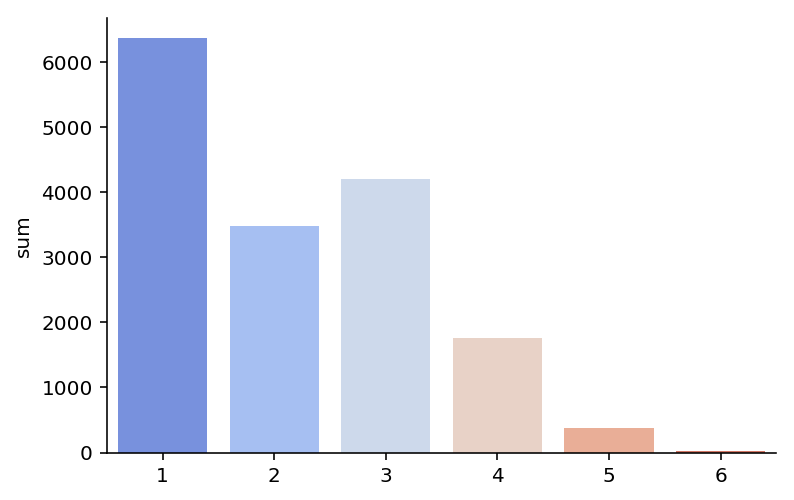

In [10]:
# checking distribution of sum of labels (i.e. how many labels a 'dirty' comment has )
sns.barplot(y = yraw['sum'].value_counts()[1:], x=yraw['sum'].value_counts()[1:].index, palette='coolwarm')
sns.despine()

In [11]:
# just curious to see examples of comments with all 6 labels
for comment in Xraw[yraw['sum'] == 6]['comment_text'].head():
    print(comment)
    print('===')

WOULDN'T BE THE FIRST TIME BITCH. FUCK YOU I'LL FIND OUT WHERE YOU LIVE, SODOMIZE YOUR WIFE AND THEN BURN YOUR HOUSE DOWN. FUCK YOU YOU FUCKING QUEER.
===
SHUT UP, YOU FAT POOP, OR I WILL KICK YOUR ASS!!!
===
You're a stupid cunt 

Fuck you dumb arse, your mum has a hairy cunt and I hope and pray that you die, no, fuck that, I wish you would die, if I had three wishes, one of them would be to have you dead, and the others would be so that everyone you knew hated your cunt like face.
===
Bitch 

You are a little bitch. I fuckin spent 6 hours on big sam (rapper) an you call it fuckin vandolism, hard ass aint you, fuck you i'm makin a true ass page an you wack off an delete my page. What the fuck is up, your like a snitch but to yourself. I'll fuckin edit your bitch ass page an delete that shit. I'll fuck up every single thing on your gay ass website if you keep deletin my ass. Wanna talk to me, IM me at GuttyBoy3D or email me at GuttyBoy3D@aol.com
===
I am going to murder ZimZalaBim ST47

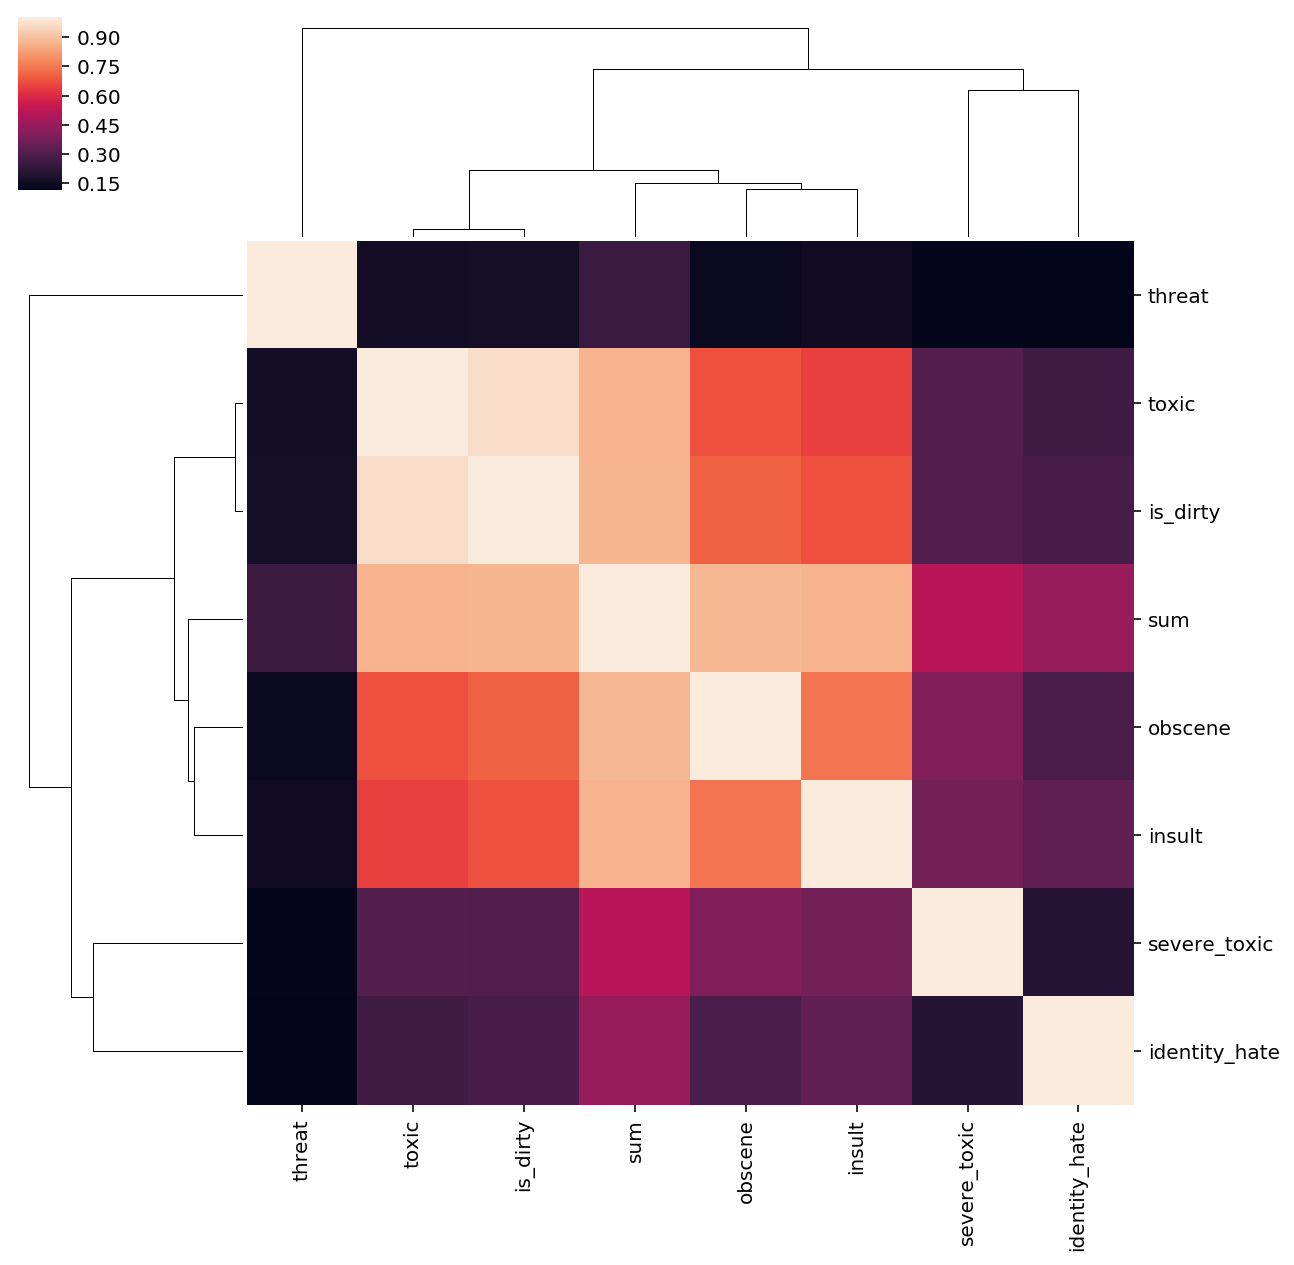

In [12]:
sns.clustermap(yraw.corr())

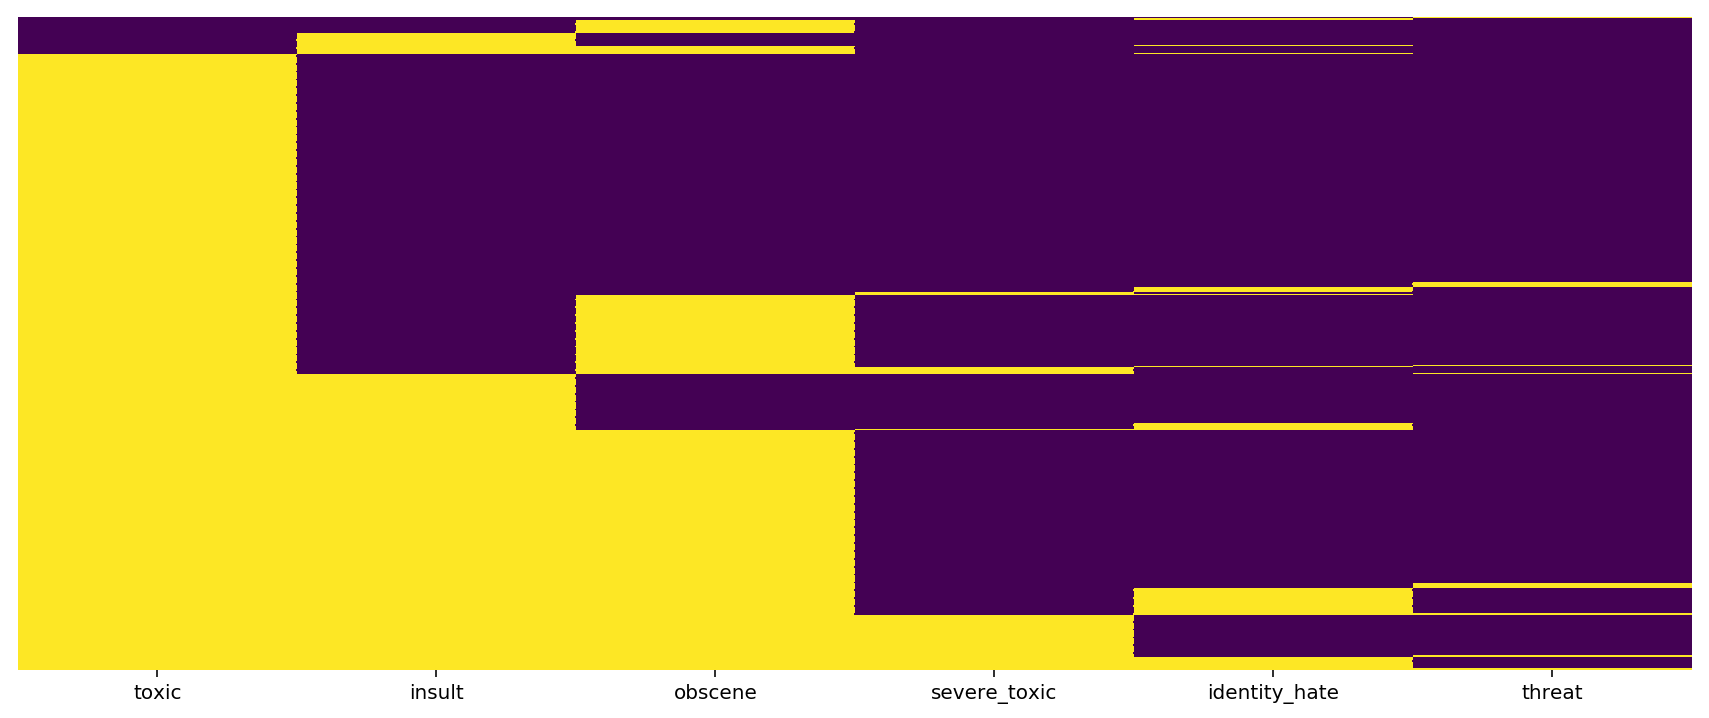

In [13]:
# used heatmap to construct quick and dirty venn diagram to check if there are any relationship bwt labels
plt.figure(figsize=(15, 6))
heat = yraw[yraw['is_dirty'] != 0].loc[:,['toxic','insult','obscene','severe_toxic','identity_hate','threat']]
heat.sort_values(by=heat.columns.tolist(),inplace=True)
sns.heatmap(heat, yticklabels=False,cbar=False,cmap='viridis')
plt.show()

#### all 'severe_toxic' labels are 'toxic', most dirty comments are 'toxic' (except a few 'insult' and/or 'obscene')
</br>

In [14]:
# examples of the rare dirty comments that are NOT toxic
for comment in Xraw[(yraw['toxic'] == 0) & (yraw['is_dirty'] == 1)]['comment_text'].head():
    print(comment)
    print('===')

REPLY ABOVE:
That was me, loser. The UN defines Vietnam to be part of Southeast Asia. And far as I know Vietnam is part of ASEAN, and used to be part of French Indochina with Laos and all those shit countries Anyway your culture has always been more influenced by SEA than Han Chinese (as in proper Yangtze Han Chinese, not the fringe indigenous tribes in Guangzhou/Guangxi). 

Just admit that you vietnamese are all a bunch of wannabe crap people. ALL the east asian people I've spoken to thinks of Vietnam as a very integral part of SEA, and we all think you're backward, dirty and speak in a horrible swearing language. Doesn't matter what crap you spout on Wikipedia, won't change the way people in the real world think.
===
How do you know he is dead.  Its just his plane that crashed.  Jeezz, quit busting his nuts, folks.
===
Hebrew Name of Lydia 
Appologies to Til Eulenspiegel I thought you were one of the idiots which your user page indicates you actually do well struggling against. 
Gene

In [15]:
# target = 'toxic'
# test = yraw.iloc[:, :6].melt(id_vars=target)
# sns.factorplot(x='value', data = test[test['value'] == 1], kind='count', hue=target, col='variable', row='value')

## CHARACTER COUNT as a feature

In [13]:
Xraw.rename(columns={'comment_text' : 'text'}, inplace=True)
Xraw['char_count'] = Xraw['text'].apply(len)

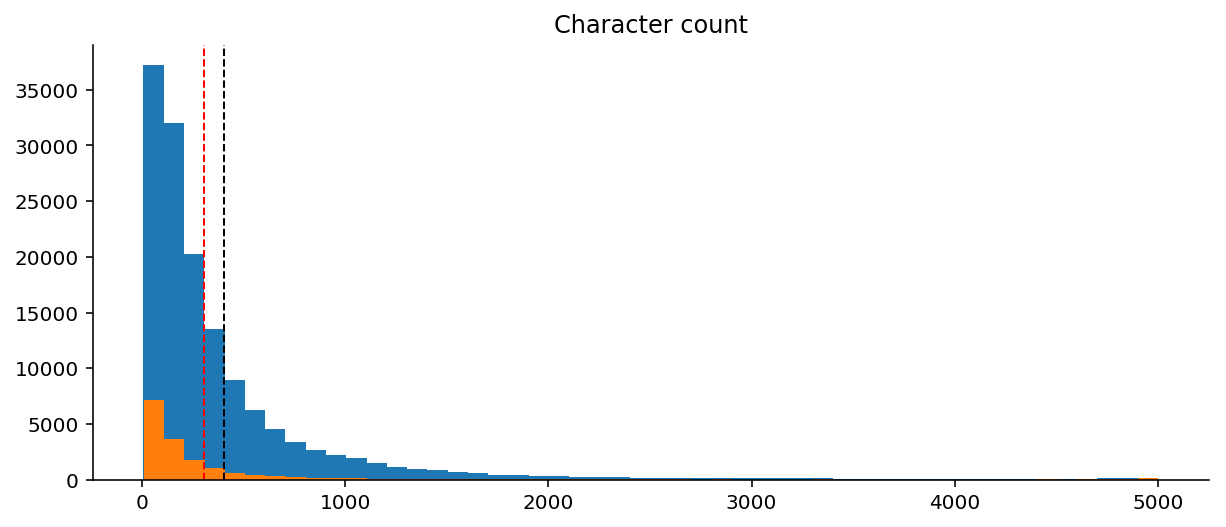

In [14]:
plt.figure(figsize=(10, 4))
plt.hist(Xraw[yraw['is_dirty']==0]['char_count'], bins=50, label='clean')
plt.hist(Xraw[yraw['is_dirty']==1]['char_count'], bins=50, label='dirty')

plt.axvline(Xraw[yraw['is_dirty']==0]['char_count'].mean(),c='black', lw=1, ls='--')
plt.axvline(Xraw[yraw['is_dirty']==1]['char_count'].mean(),c='red', lw=1, ls='--')
plt.title('Character count')
sns.despine()
plt.show()

In [15]:
Xraw['char_count'].mean(), Xraw['char_count'].std()

(394.0732213246768, 590.7202819048923)

In [16]:
(Xraw[yraw['is_dirty']==0]['char_count']).mean(), \
(Xraw[yraw['is_dirty']==1]['char_count']).mean()

(404.3471739706724, 303.30403697996917)

#### dirty comments are typically shorter than clean comments

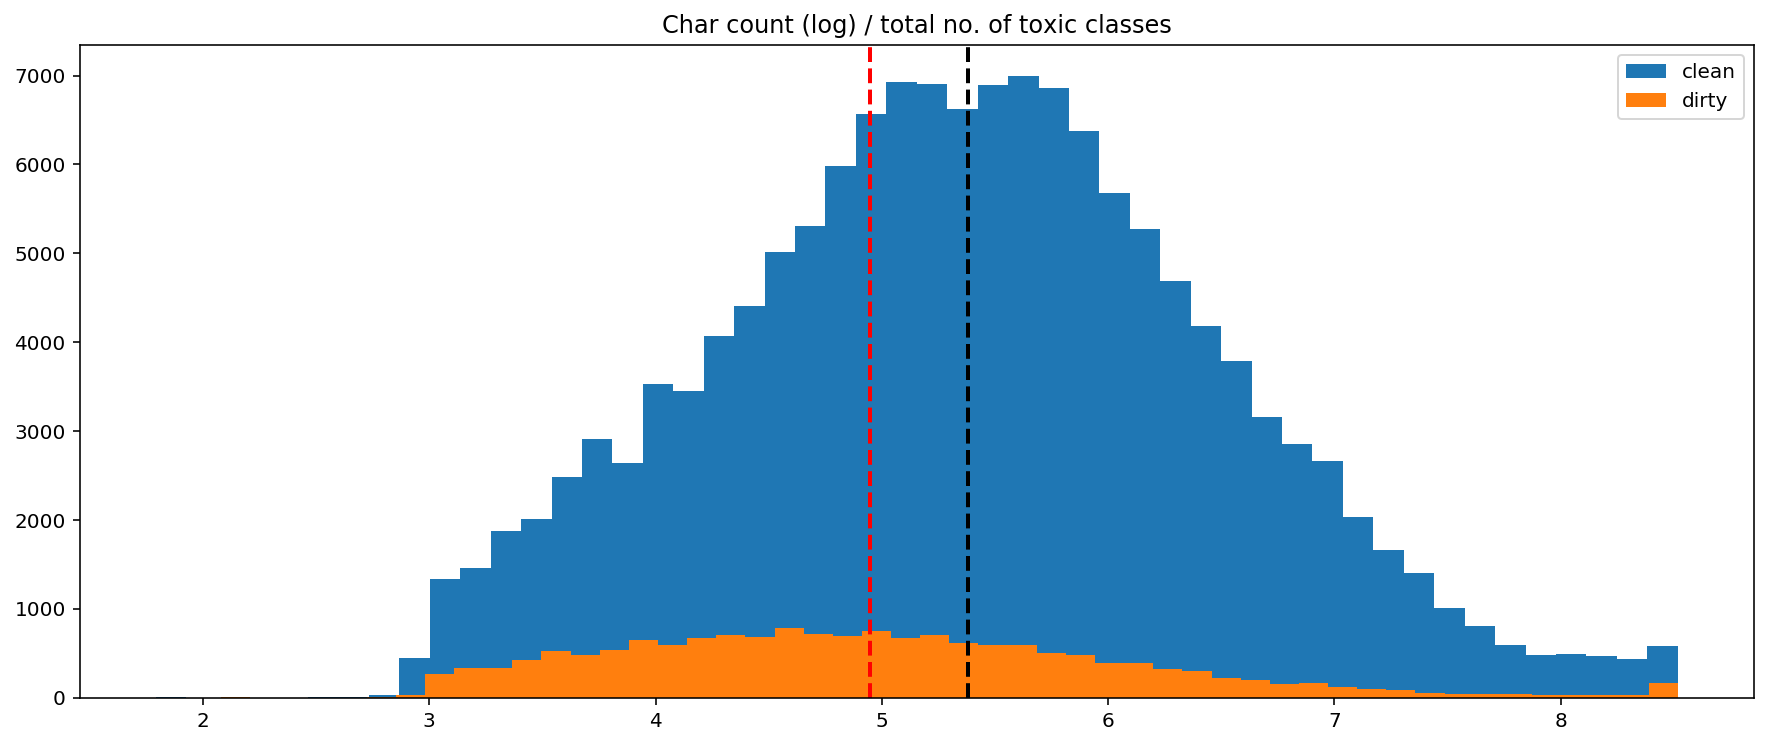

In [17]:
plt.figure(figsize=(15, 6))
plt.hist(np.log(Xraw[yraw['is_dirty']==0]['char_count']), bins=50, label='clean')
plt.hist(np.log(Xraw[yraw['is_dirty']==1]['char_count']), bins=50, label='dirty')

plt.axvline(np.log(Xraw[yraw['is_dirty']==0]['char_count']).mean(),c='black', lw=2, ls='--')
plt.axvline(np.log(Xraw[yraw['is_dirty']==1]['char_count']).mean(),c='red', lw=2, ls='--')

plt.title('Char count (log) / total no. of toxic classes')
plt.legend()
plt.show()

In [18]:
Xraw['log_char_count'] = np.log(Xraw['char_count'])

In [19]:
# plt.hist(np.log(Xraw[yraw['is_dirty']==1]['char_count']), bins=50, label='clean', color='orange')
# plt.axvline(np.log(Xraw[yraw['is_dirty']==1]['char_count']).mean(),c='red', lw=2, ls='--')

# plt.show()

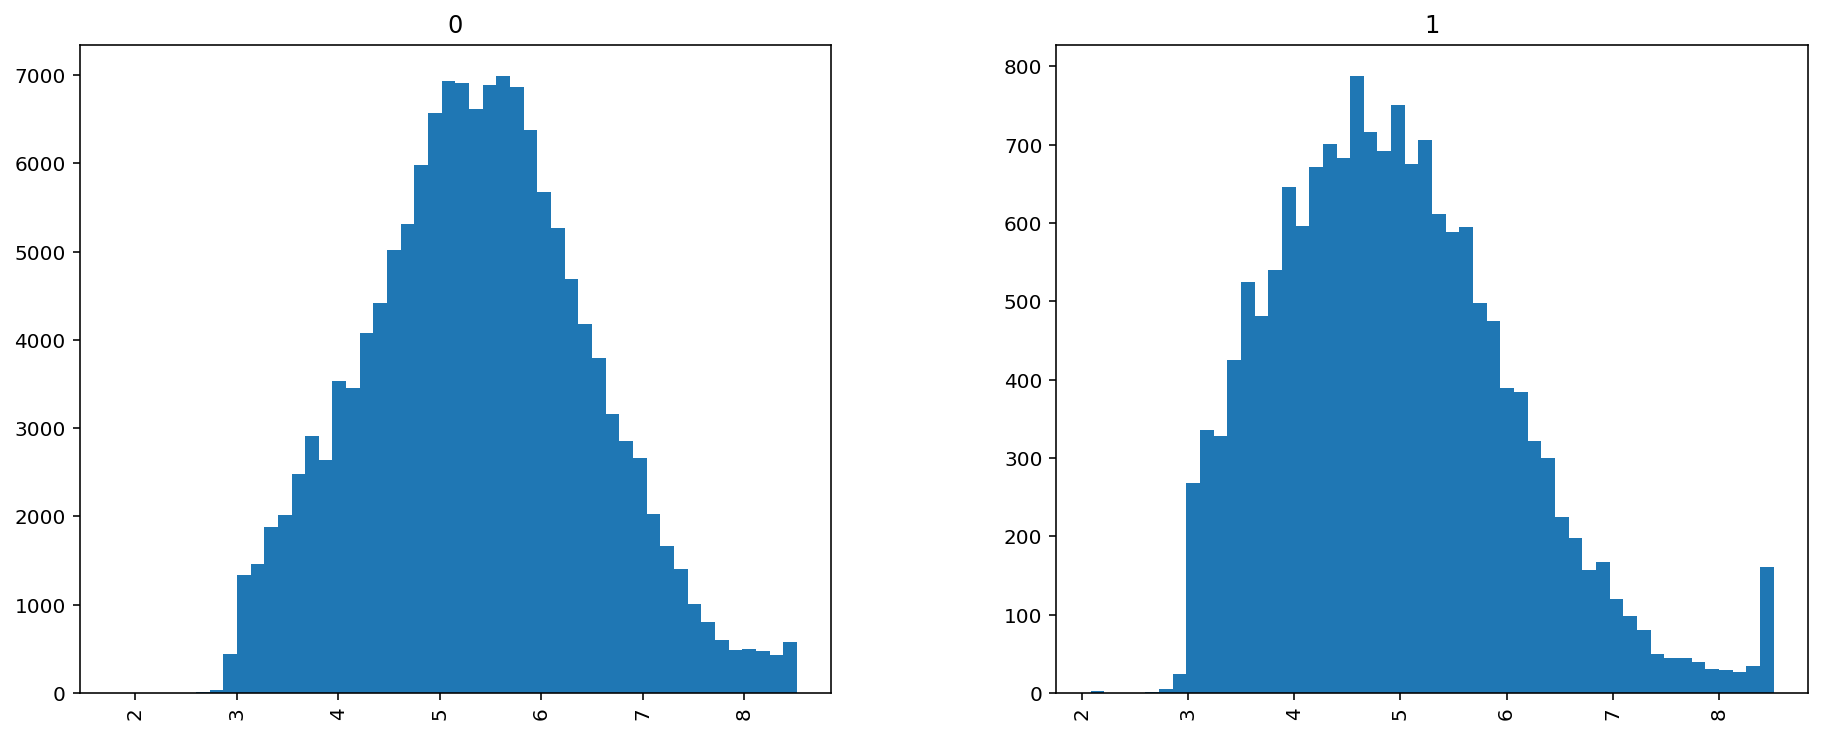

In [23]:
Xraw.hist(column='log_char_count', by=yraw['is_dirty'], bins=50,figsize=(15,6),)
plt.show()

In [24]:
Xraw[(yraw['is_dirty'] ==0) & (Xraw['char_count'] == 5000)]['text']

16643     '''Hi Wikipedia!!Hi Wikipedia!!Hi Wikipedia!!H...
18183     Hey guys I love chicken rice=)Hey guys I love ...
25702     "....would you prefer expressing my frustratio...
35316     MarxismLONG LIVE ANONYMOUS PHILIPPINESLONG LIV...
47715     Block Block Block Block Block Block Block Bloc...
70544     delete this pagedelete this pagedelete this pa...
74753     Dont Change It!!!! zzzzzzzzzzzzzzzzzzzzzzzzzzz...
75165     IN THE NAME OF YTMND!IN THE NAME OF YTMND!IN T...
86529     Wikipedia tEh Free Enyclopedia!!!!!!!!!!!!!!!!...
158970    Hi Wikipedia!!Hi Wikipedia!!Hi Wikipedia!!Hi W...
Name: text, dtype: object

#### when we apply log to the character count, we can also see that despite being typically shorter, there is a higher percentage of dirty comments that hit the max 5000 character count limit (due to spam)

In [25]:
# one guy who managed to hit 5000 characters without any spam *_*
print(Xraw.loc[25702,'text'])

"....would you prefer expressing my frustration in what i don't agree with and try to say it as direct and respectful as possible or would you prefer for me to not say much and be harsh to you and not give care to what you sat? would that be suit you better?i could..but i don't think that's what you want...ramblings you said just because you don't like to be told off doesn't mean its rambling, deal with it like a MAN  and take criticism because not everyone  does things the same way...so for you or anyone complaining about speaking one's mind i could care less tbh but you're abusing your power and you are the reason or one of the reasons you make it unpleasant for some to edit in wikipedia...even when i try to to make good edits and a lot more thorough and informative you have a complaint about it.. i'm doing exactly the same thing you are doing pal, are not any more or lesser than me....don't talk the talk if you can't take it when people speak their mind about things you don't want t

In [26]:
Xraw[(yraw['is_dirty']==1) & (Xraw['char_count'] == 5000)].head()

,id,text,char_count,log_char_count
4174,0b2055f13934a41e,ii CAN STILL POST WITH THIS COMPUTER...I SAID ...,5000,8.517193
6201,1091689382892a88,SECURITYFUCK HOMELAND SECURITYFUCK HOMELAND SE...,5000,8.517193
8705,171ebb2b785f72bd,BALLS BALLS BALLS BALLS BALLS BALLS BALLS BALL...,5000,8.517193
9673,199912b2d9973a21,"FUCK YOU, YOU ATHEIST CUNT! FUCK YOU, YOU ATHE...",5000,8.517193
10769,1c7b06718dcc3b86,TOMMY2010 IS A NIGGER TOMMY2010 IS A NIGGER TO...,5000,8.517193


## UNIQUE WORDS / WORD COUNT as features

In [27]:
word_count = Xraw['text'].apply(lambda x: x.replace('\n',' ').split())
Xraw['word_count'] = word_count.str.len()

In [28]:
Xraw['unique_word_count'] = word_count.apply(lambda x: len(set(x)))
Xraw['unique_ratio'] = Xraw['unique_word_count']/Xraw['word_count']

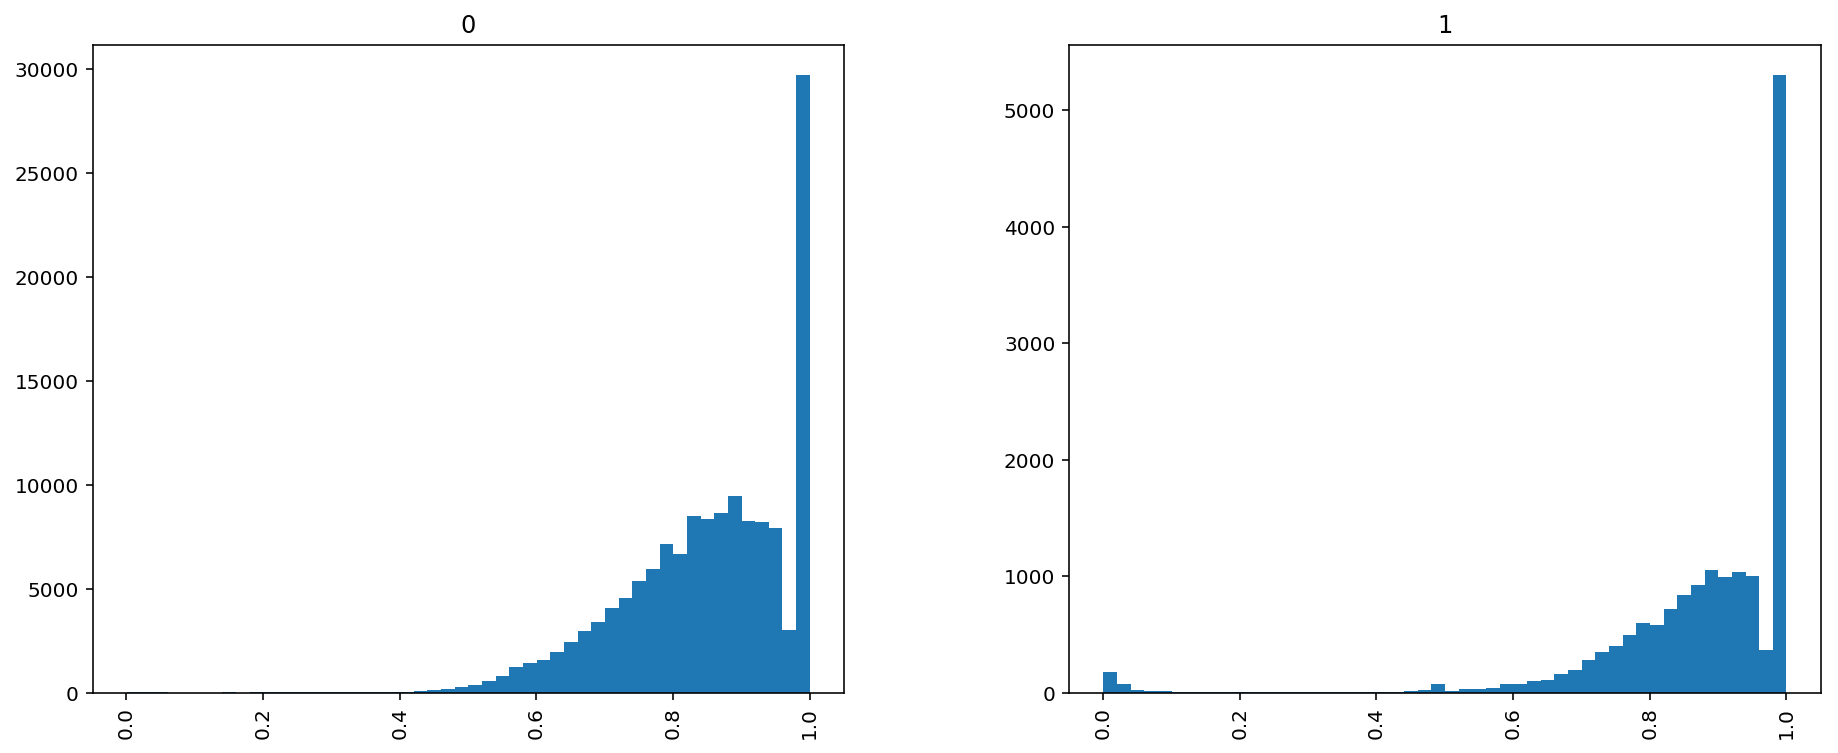

In [29]:
Xraw.hist(column='unique_ratio', by=yraw['is_dirty'], bins=50,figsize=(15,6),)
plt.show()

#### unique ratios are more or less similar across clean and dirty comments, with the exception of some dirty comments having a unique ratio of close to zero (again, probably due to spam)

/Users/Han/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


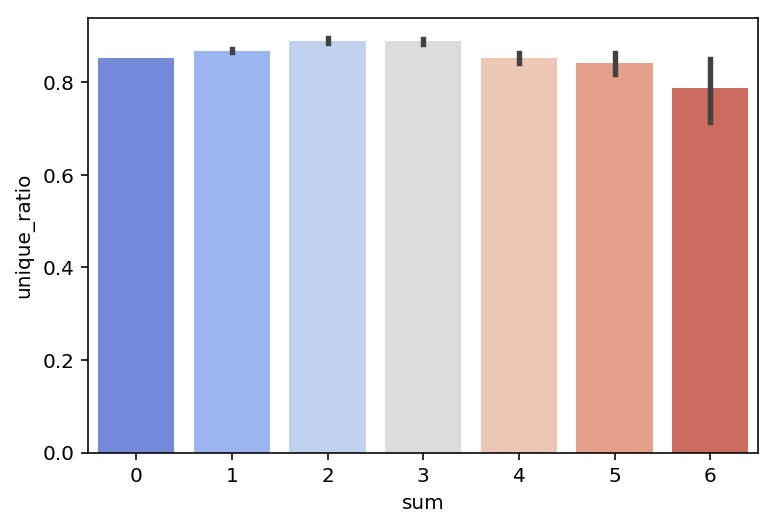

In [30]:
sns.barplot(x=yraw['sum'], y=Xraw['unique_ratio'], palette='coolwarm')
plt.show()

In [31]:
yraw[Xraw['unique_ratio'] < 0.2]['is_dirty'].value_counts()/(Xraw['unique_ratio'] < 0.2).sum()

1    0.781638
0    0.218362
Name: is_dirty, dtype: float64

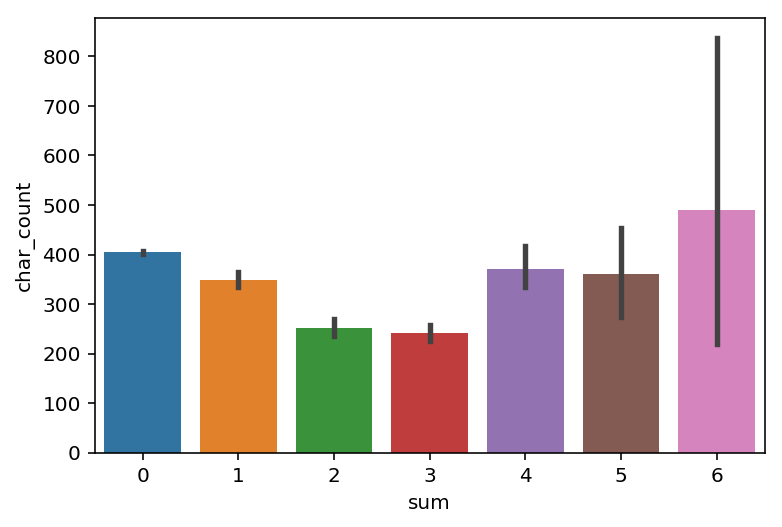

In [32]:
sns.barplot(yraw['sum'], y=Xraw['char_count'])
plt.show()

In [33]:
# stock-take of the features we currently have
Xraw.head()

,id,text,char_count,log_char_count,word_count,unique_word_count,unique_ratio
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,264,5.575949,43,41,0.953488
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,112,4.718499,17,17,1.000000
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",233,5.451038,42,39,0.928571
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",622,6.432940,113,82,0.725664
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",67,4.204693,13,13,1.000000


## Sentiment Analysis

In [20]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, ENGLISH_STOP_WORDS as esw
from nltk.corpus import stopwords
import spacy
import en_core_web_sm
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
import re

In [21]:
# taking a sample for EDA. For modelling, applied on full set (i.e. Xraw)
Xsample = Xraw[:4000]
ysample = yraw[:4000]

In [22]:
# tokenise by sentence first (referenced from vader documentation)
Xsample['text'] = Xsample['text'].apply(lambda x : x.replace('\n', ' '))
Xsent = Xsample['text'].apply(lambda x: sent_tokenize(x))

/Users/Han/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [23]:
vader = SentimentIntensityAnalyzer()

In [24]:
# extracting the average sentence polarity scores in each comment
sentiment = []
for row in Xsent:
    sente_senti = [vader.polarity_scores(sentence) for sentence in row]
    neg = np.mean([senti['neg'] for senti in sente_senti])
    neu = np.mean([senti['neu'] for senti in sente_senti])
    pos = np.mean([senti['pos'] for senti in sente_senti])
    compound = np.mean([senti['compound'] for senti in sente_senti])
    sentiment.append([neg, neu, pos, compound])

In [26]:
sentiment = pd.DataFrame(sentiment, columns=['neg', 'neu', 'pos', 'compound'])
sentiment.head()

,neg,neu,pos,compound
0,0.000000,0.896333,0.103667,0.212133
1,0.050000,0.700000,0.250000,0.047600
2,0.109333,0.815667,0.075000,-0.035167
3,0.028250,0.927000,0.044750,0.130600
4,0.000000,0.652000,0.348000,0.403700


In [27]:
Xsample = Xsample.join(sentiment)

/Users/Han/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/Han/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


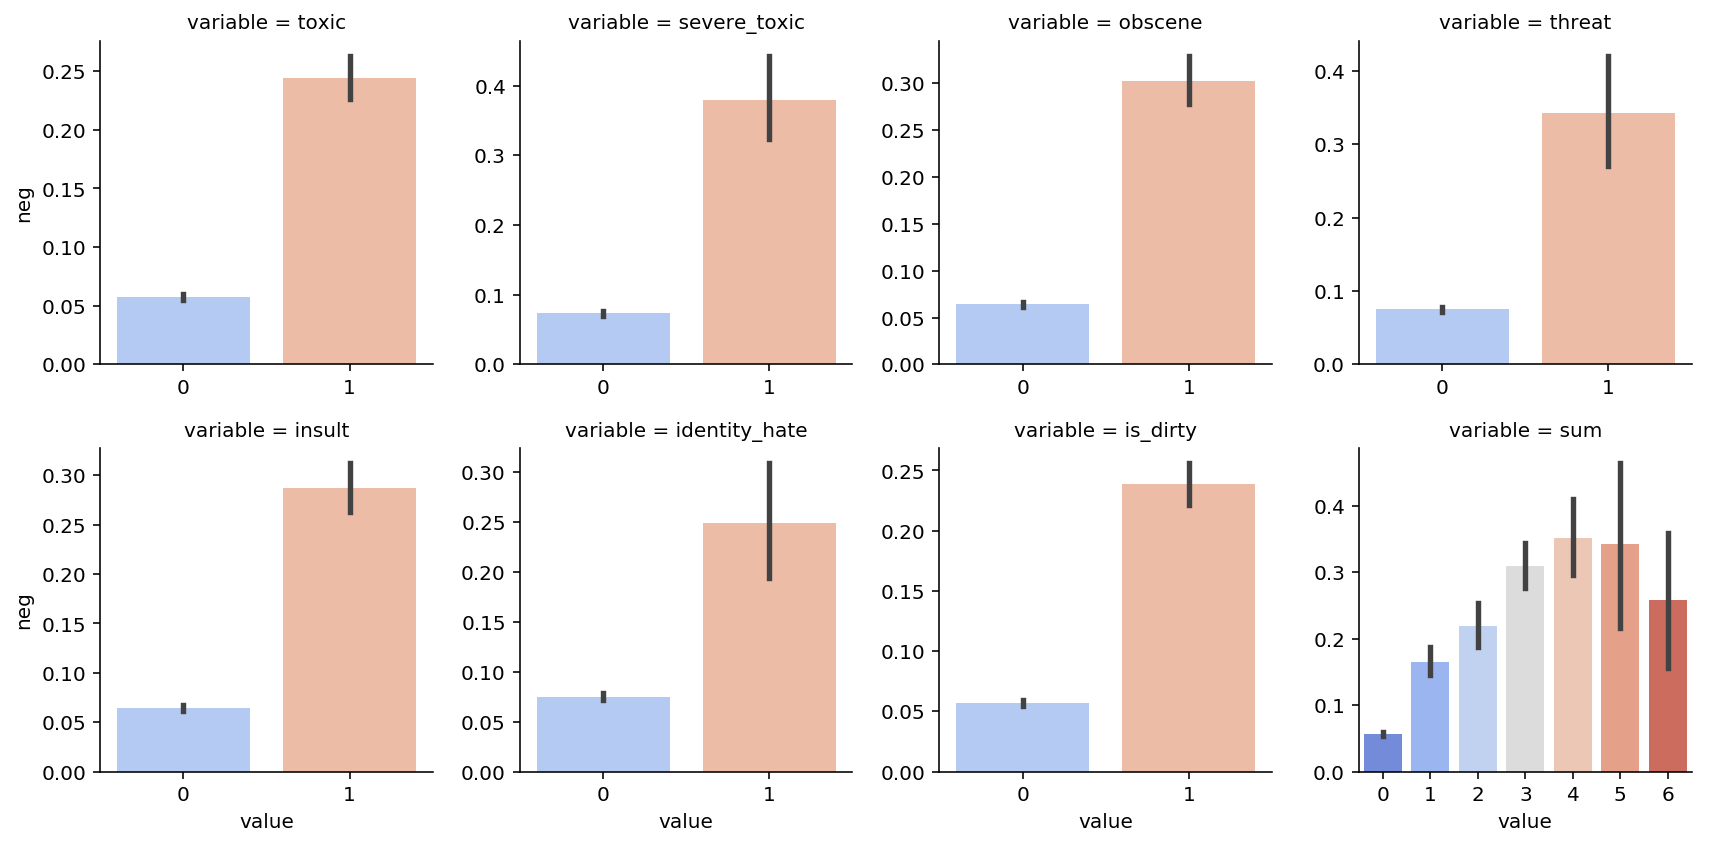

In [43]:
# negative sentiment as a feature
quant_features = ysample.join(Xsample['neg'])
quant_plot = pd.melt(quant_features, id_vars='neg')
g = sns.FacetGrid(quant_plot, col='variable', col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.barplot, 'value','neg', palette= 'coolwarm')

/Users/Han/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


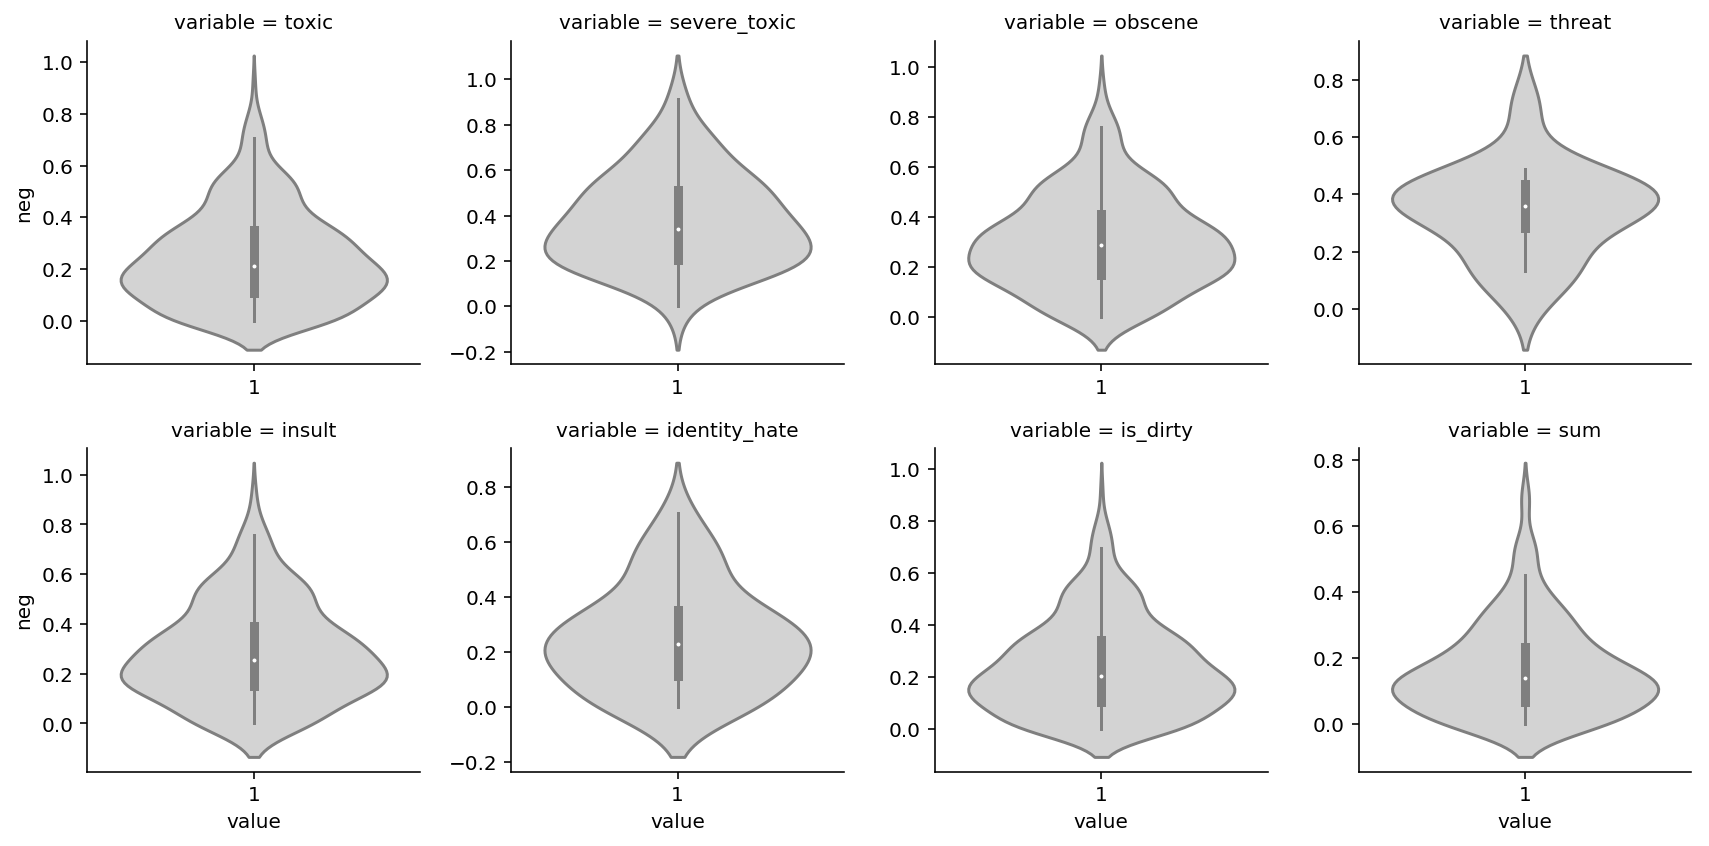

In [44]:
g = sns.FacetGrid(quant_plot[quant_plot['value'] == 1], col='variable', col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.violinplot, 'value','neg', color='lightgrey')
#toxic vs severe toxic : mean of neg sentiment and dist diff

## Profanities

In [32]:
# importing some publicly available profanity libraries
from urllib import request
url1 = 'https://raw.githubusercontent.com/RobertJGabriel/Google-profanity-words/master/list.txt'
txt1 = request.urlopen(url1).readlines()
url2 = 'https://raw.githubusercontent.com/areebbeigh/profanityfilter/master/profanityfilter/data/badwords.txt'
txt2 = request.urlopen(url2).readlines()

In [77]:
google_profanity = [line.decode("utf-8").replace('\n','') for line in txt1]
areeb_profanity = [line.decode("utf-8").replace('\n','').lower() for line in txt2]
profanities = list(set(google_profanity + areeb_profanity))

In [45]:
# some basic text pre-processing
def lower_case(word_array):
    word_array = word_array.str.lower()
    return word_array

stop = stopwords.words('english')
def remove_stopwords(word_array):
    word_array = word_array.apply(lambda x: " ".join(x for x in x.split() if x not in stop))
    return word_array
    
def remove_punc(word_array):
    word_array = word_array.str.replace('[^\w\s]' ,'')
    word_array = word_array.str.replace('\n','')
    word_array = word_array.str.replace('  ' ,' ')
    return word_array

st = PorterStemmer()
def stem_words(word_array):
    word_array = word_array.apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
    return word_array

def tokenize(word_array):
    word_array = word_array.apply(word_tokenize)
    return word_array

wnl = WordNetLemmatizer()
def lemm_words(word_array):
    word_array = word_array.apply(lambda x: " ".join([wnl.lemmatize(word) for word in x.split()]))
    return word_array

def remove_numbers(word_array):
    word_array = word_array.apply(lambda x : re.sub(r'\d+', '', x))
    return word_array

In [79]:
def clean_pipeline(word_array):
    word_array = lower_case(word_array)
    word_array = remove_stopwords(word_array)
    #word_array = remove_punc(word_array)
    word_array = lemm_words(word_array)
    #word_array = remove_numbers(word_array)
    #word_array = stem_words(word_array)
    word_array = tokenize(word_array)
    return word_array

In [80]:
Xword = clean_pipeline(Xraw['text'])

In [81]:
profanity_count = []
for comment in Xword:
    profanity_count.append(len([x for x in comment if x in profanities]))

In [82]:
Xraw.shape

(159571, 7)

In [83]:
Xraw['profanity_count'] = profanity_count

/Users/Han/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


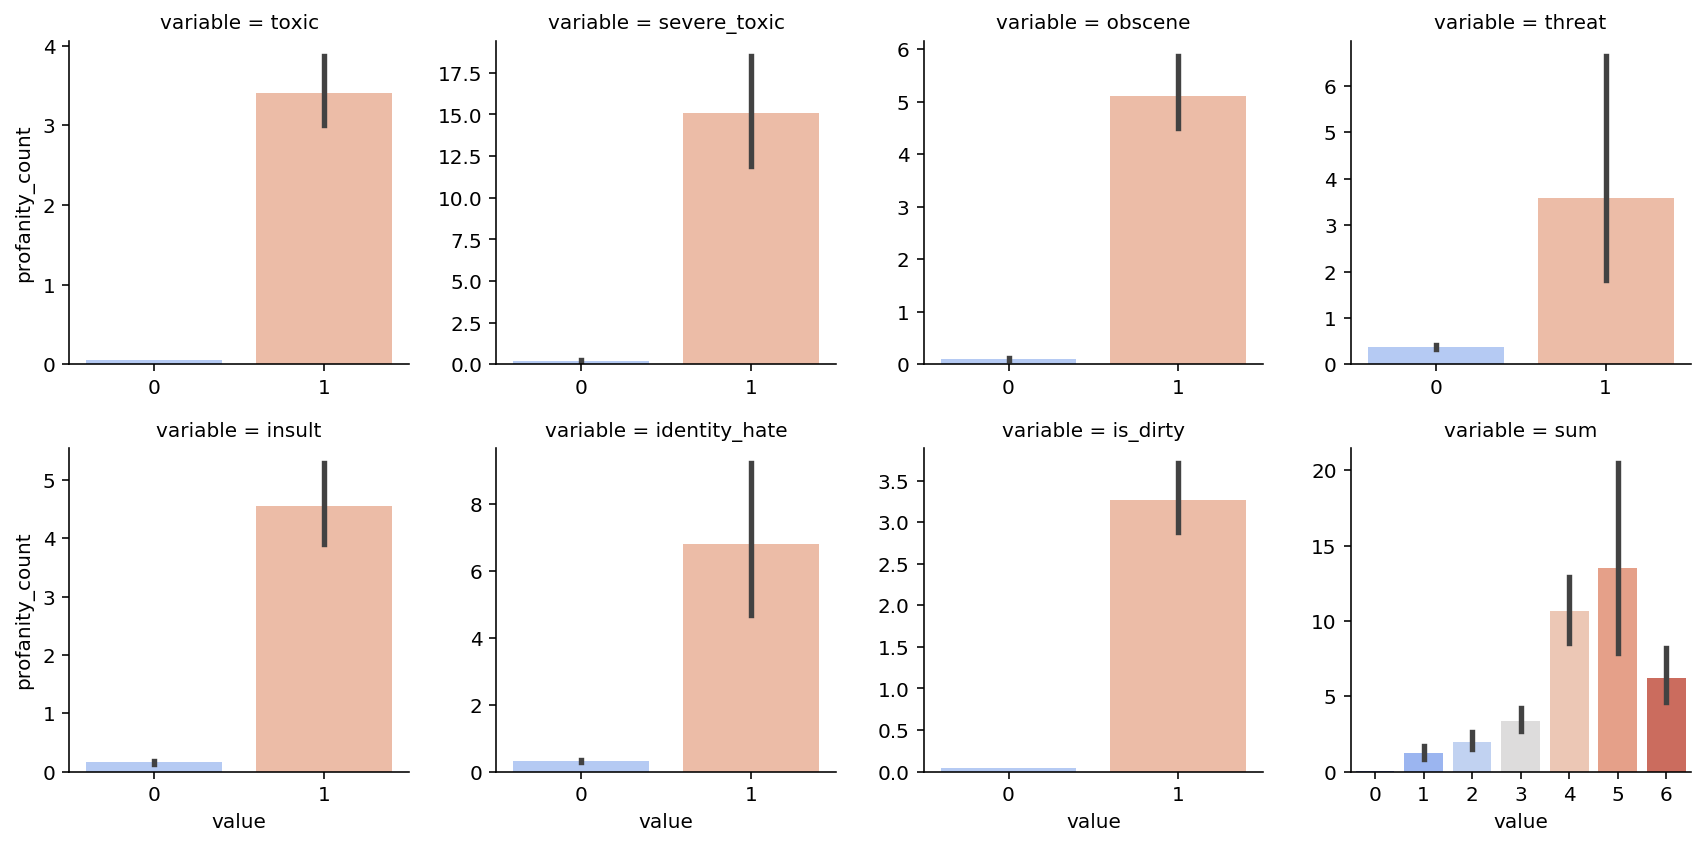

In [85]:
# no. of profanities as a feature
quant_features = yraw.join(Xraw['profanity_count'])
quant_plot = pd.melt(quant_features, id_vars='profanity_count')
g = sns.FacetGrid(quant_plot, col='variable', col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.barplot, 'value','profanity_count', palette= 'coolwarm')

## No. of punctuation and caps

In [28]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [29]:
punc = [len(re.findall('[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]', comment)) for comment in Xraw['text']]
Xraw['punc'] = punc

/Users/Han/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/Han/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


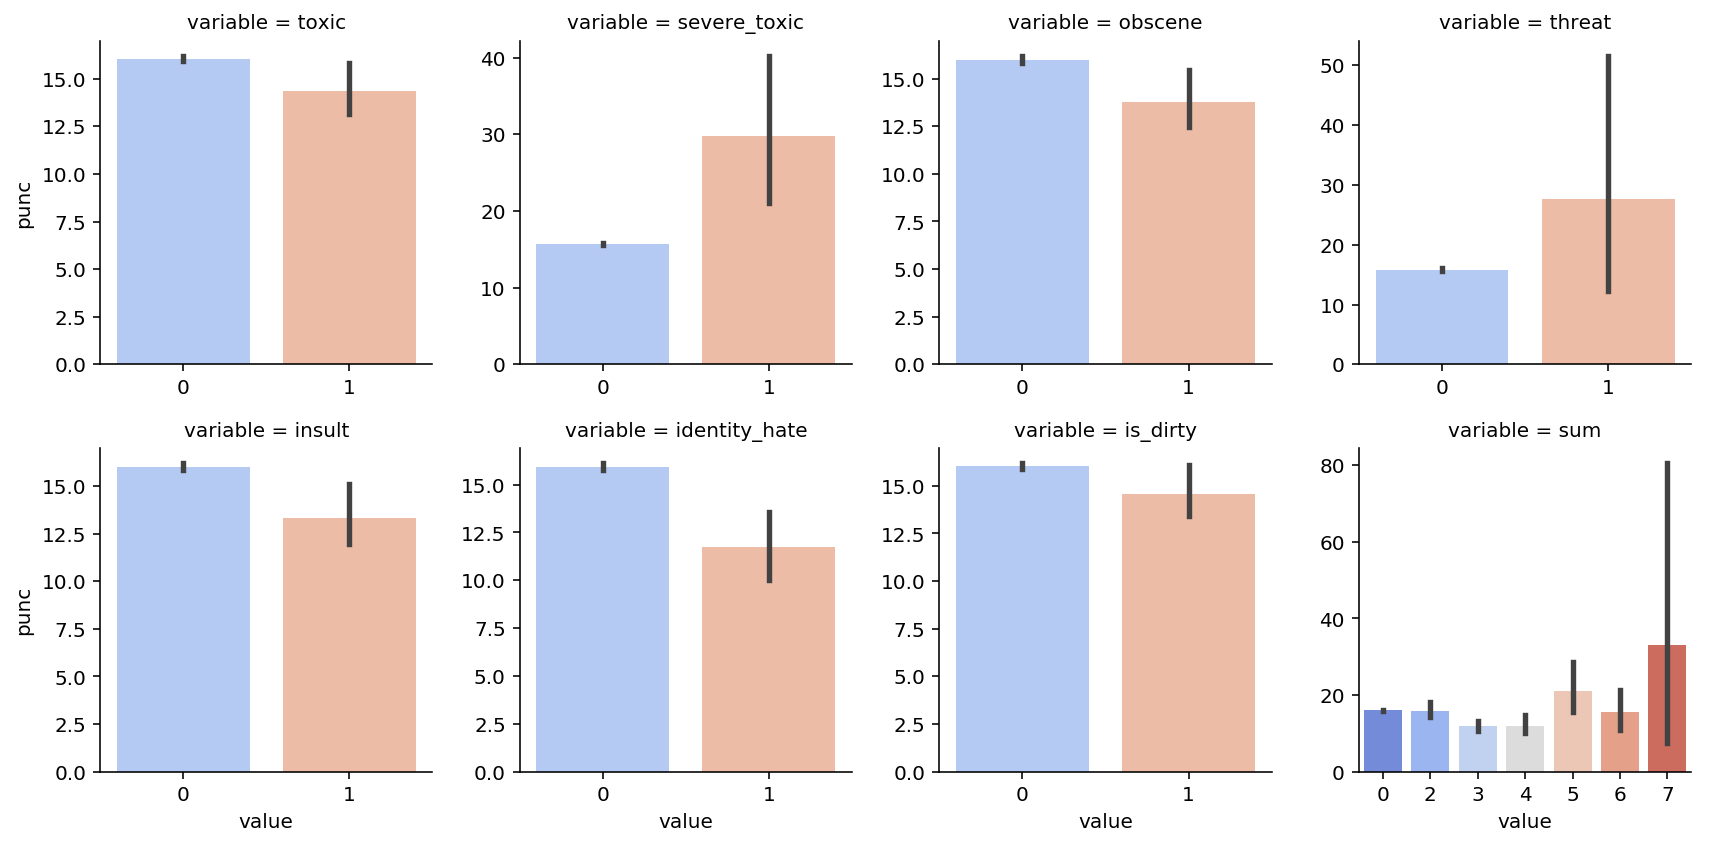

In [30]:
# no of punc as a feature
quant_features = yraw.join(Xraw['punc'])
quant_plot = pd.melt(quant_features, id_vars='punc')
g = sns.FacetGrid(quant_plot, col='variable', col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.barplot, 'value','punc', palette= 'coolwarm')

In [88]:
rtrain[Xraw['punc'] > 1000]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
19179,32a6bdbfc270ebc1,U SUCK!!!!\nU SUCK!!!!'U SUCK!!!!U SUCK!!!!'U ...,1,1,1,0,1,0
27692,4953222edcf06486,Small penis/////Small penis/////Small penis///...,1,1,1,0,1,0
28855,4c7963eaf9697d35,JIM WALES MUST DIE!!!!!!!!!!!! JIM WALES MUST...,1,1,0,1,0,0
31042,52791a0d0a4ba563,Is weezer okay?Is weezer okay?Is weezer okay?I...,0,0,0,0,0,0
40485,6c0b6e54d0b2ca24,LUNCHABLES!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!...,1,0,0,0,0,0
48878,82af3b426e8bad90,"Wikipedia, I have one itty bitty question. LEA...",0,0,0,0,0,0
52727,8cee04ab6861a675,I'M GONNA KILL YOU!!!!!!!!!!!!!!!!!!!!!!!!!!!!...,1,1,0,1,0,0
56063,95d211c0f481df03,AH HAAHHAHAHAH YAAA BITCH YAAAA!@!!!!!!AH HAAH...,1,1,1,0,1,0
67761,b54951588a1207ea,"This signature from, (Mr. Geroge W. Bush)\n\n...",0,0,0,0,0,0
75499,c9f42b4dedc3cbf0,YOU!\nYou blocked me worm why!!!!!!!!!!!!!!!!!...,1,0,0,0,0,0


In [89]:
Xraw.loc[67761, 'text']

'This signature from,  (Mr. Geroge W. Bush)\n\nSign  your name here___________________________________________________\nTABThis mail is going to the US Capitol on 4/20/09. This mail is so important that you could ask some questions and etc… Tell me and write it  as many you like to. You may have to correct your question correctly, But, you could only ask me about 5-10 questions at a time. Notice the US Capitol security will take a look at this mail first, because this mail is so private. This mail is also safe too, and so if this mail is appropriate for me, I will send this mail back. And my question is, What do you know about ower justice? If you have an answer, send me a mail.\nTABAnyway, I would like to say ThankYou very much to see this mail and I’m looking forward your question. And don’t forget to fill out this important information below that that says ‘Security Information:’below. Thank You!\n\n                                          Security Information:\n\nYour E-mail:_____

In [90]:
caps = [len(re.findall('[A-Z]', comment)) for comment in Xraw['text']]
Xraw['caps'] = caps

/Users/Han/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


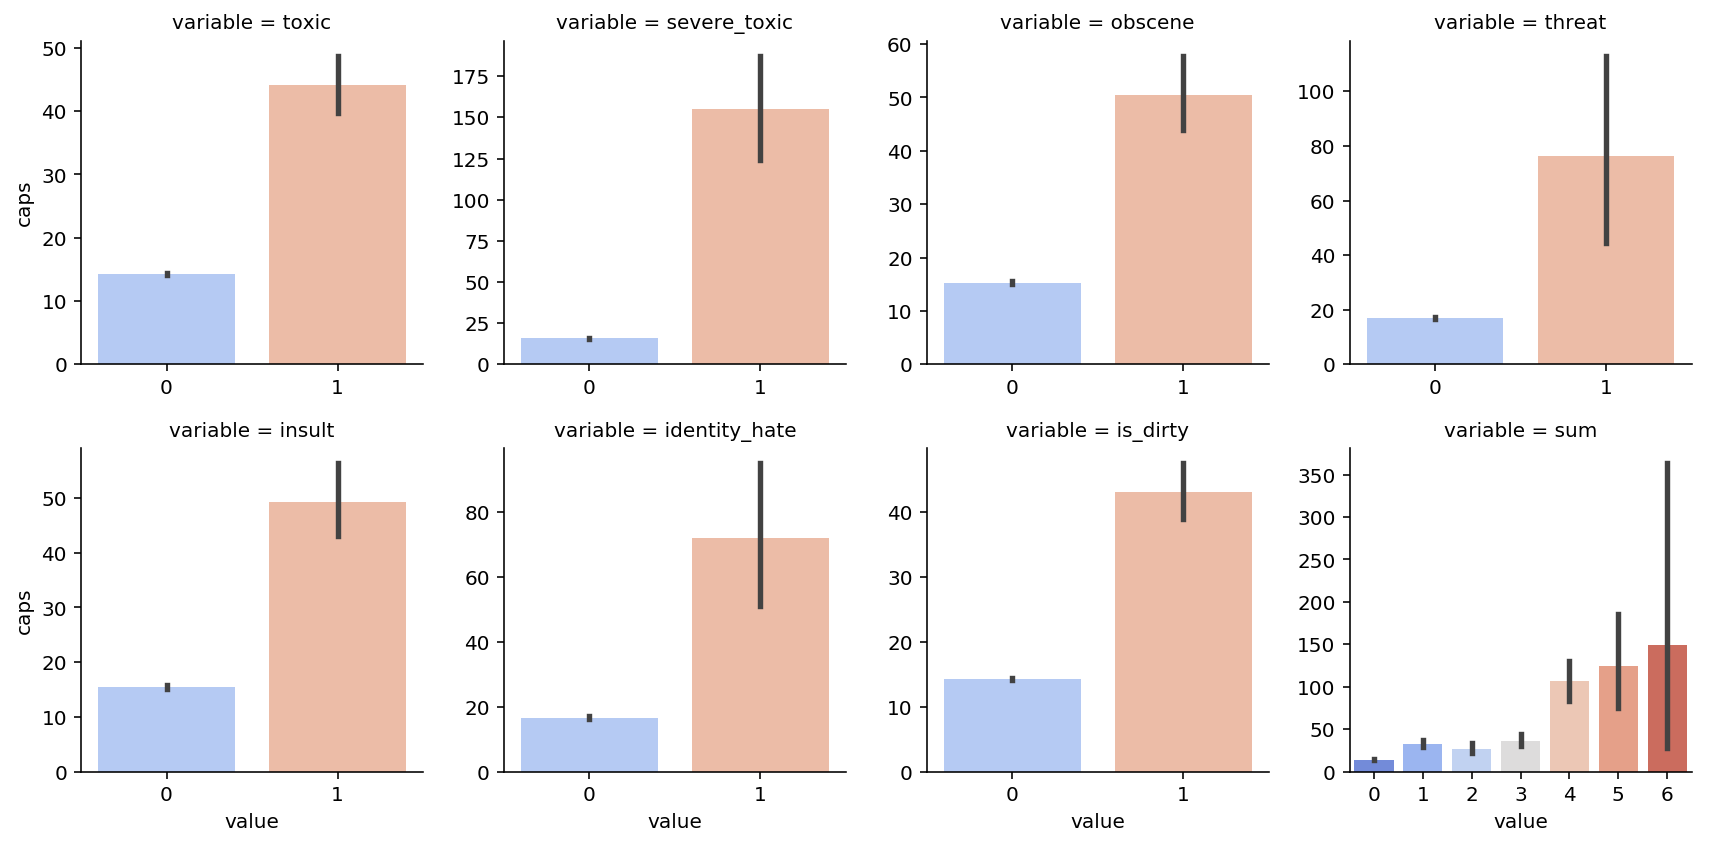

In [91]:
# no of capital letters as a feature
quant_features = yraw.join(Xraw['caps'])
quant_plot = pd.melt(quant_features, id_vars='caps')
g = sns.FacetGrid(quant_plot, col='variable', col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.barplot, 'value','caps', palette= 'coolwarm')

# To summarise:
- (Somewhat) No. of unique words 
- (Somewhat) No. of chars per doc 
- (Somewhat) No. of punctuation - *can further tune for type of punc*
- (YES) Sentiment Analysis
- (YES) Profanities
- (YES) No. of uppercase

Other potential features:
- No. of words per sentences
- No. of sentences
- No. of chars per word / max word length
- Sentence structure - POS tagging
- etc


## TF-IDF to see most relevant words for each label

In [46]:
def clean_pipeline(word_array):
    word_array = lower_case(word_array)
    word_array = remove_stopwords(word_array)
    word_array = remove_punc(word_array)
    word_array = lemm_words(word_array)
    word_array = remove_numbers(word_array)
    #word_array = stem_words(word_array)
    #word_array = tokenize(word_array)
    return word_array

In [47]:
ysample.columns[:6]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [48]:
temp_list = [[],[],[],[],[],[]]
for i, column in enumerate(yraw.columns[:6]):
    temp_list[i] = Xraw[yraw[column] == 1]['text'].head(4000)

In [49]:
toxic_only = clean_pipeline(temp_list[0])
severe_toxic_only = clean_pipeline(temp_list[1])
obscene_only = clean_pipeline(temp_list[2])
threat_only = clean_pipeline(temp_list[3])
insult_only = clean_pipeline(temp_list[4])
identity_hate_only = clean_pipeline(temp_list[5])

In [50]:
tfv1 = TfidfVectorizer(min_df=10,  max_features=10000, 
            strip_accents='unicode', analyzer='word',ngram_range=(1,2),
            use_idf=1,smooth_idf=1,sublinear_tf=1, lowercase=False)

In [51]:
unigram = tfv1.fit_transform(toxic_only)
features = np.array(tfv1.get_feature_names())
temp_df = pd.DataFrame(unigram.todense(), columns=features)
toxic_only_tfidf = temp_df.sum().sort_values()

In [52]:
unigram = tfv1.fit_transform(severe_toxic_only)
features = np.array(tfv1.get_feature_names())
temp_df = pd.DataFrame(unigram.todense(), columns=features)
severe_toxic_only_tfidf = temp_df.sum().sort_values()

In [53]:
unigram = tfv1.fit_transform(obscene_only)
features = np.array(tfv1.get_feature_names())
temp_df = pd.DataFrame(unigram.todense(), columns=features)
obscene_only_tfidf = temp_df.sum().sort_values()

In [54]:
unigram = tfv1.fit_transform(threat_only)
features = np.array(tfv1.get_feature_names())
temp_df = pd.DataFrame(unigram.todense(), columns=features)
threat_only_tfidf = temp_df.sum().sort_values()

In [55]:
unigram = tfv1.fit_transform(insult_only)
features = np.array(tfv1.get_feature_names())
temp_df = pd.DataFrame(unigram.todense(), columns=features)
insult_only_tfidf = temp_df.sum().sort_values()

In [56]:
tfv1.fit(identity_hate_only)
identity_hate_only_unigram =  tfv1.transform(identity_hate_only)
features = np.array(tfv1.get_feature_names())
identity_hate_tfidf = pd.DataFrame(identity_hate_only_unigram.todense(), columns=features)
identity_hate_only_tfidf = identity_hate_tfidf.sum().sort_values()

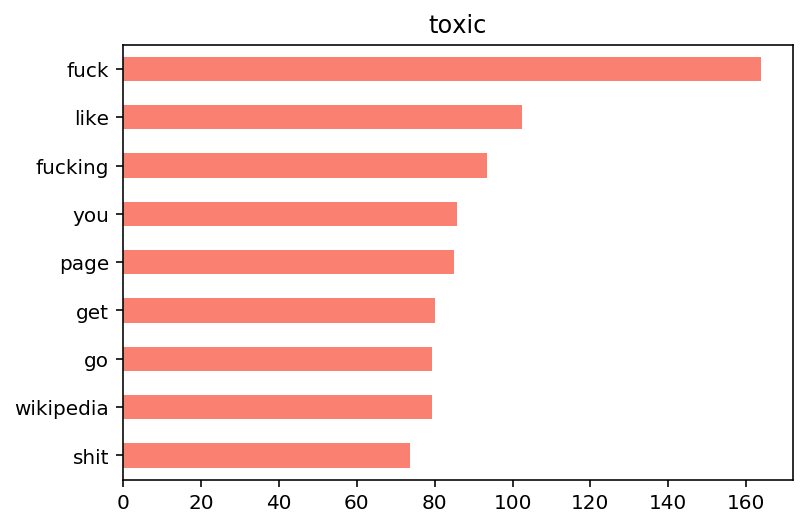

In [57]:
toxic_only_tfidf.tail(9).plot(kind='barh',color='salmon')
plt.title('toxic')
plt.show()

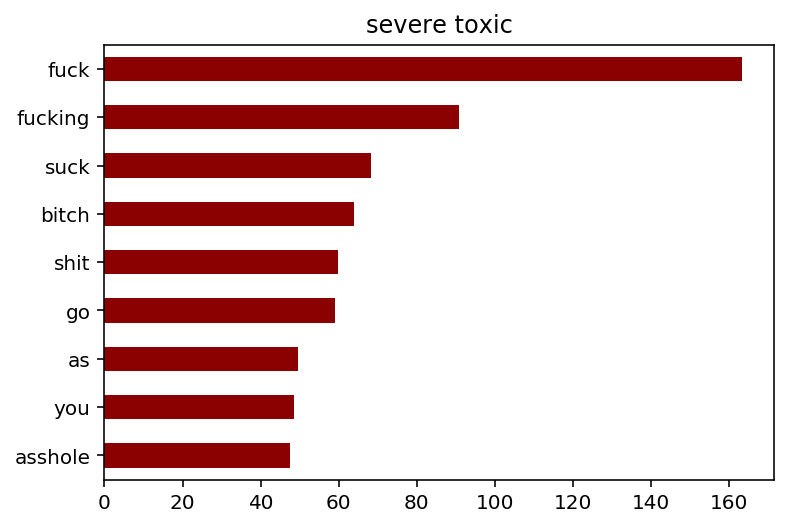

In [58]:
severe_toxic_only_tfidf.tail(9).plot(kind='barh',color='darkred')
plt.title('severe toxic')
plt.show()

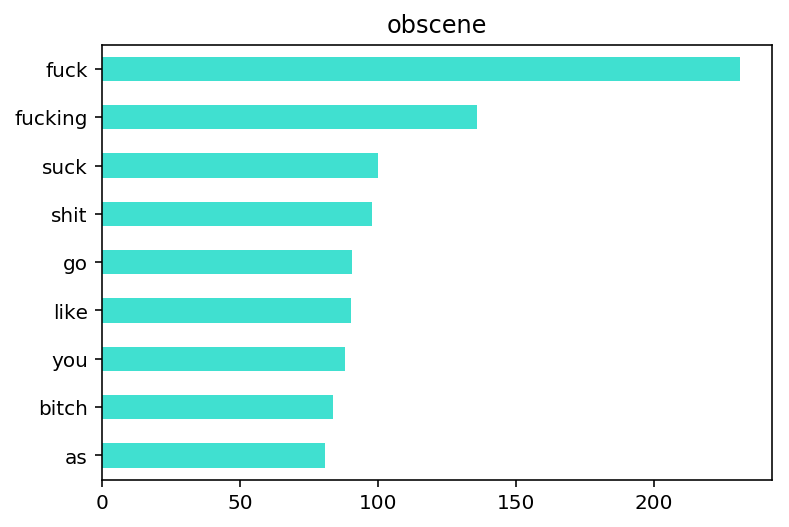

In [59]:
obscene_only_tfidf.tail(9).plot(kind='barh',color='turquoise')
plt.title('obscene')
plt.show()

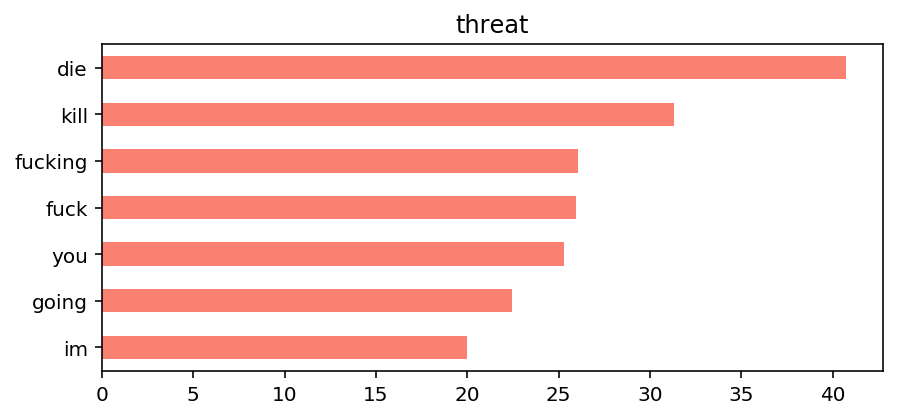

In [100]:
plt.figure(figsize=(7,3))
threat_only_tfidf.tail(7).plot(kind='barh',color='salmon')
plt.title('threat')
plt.show()

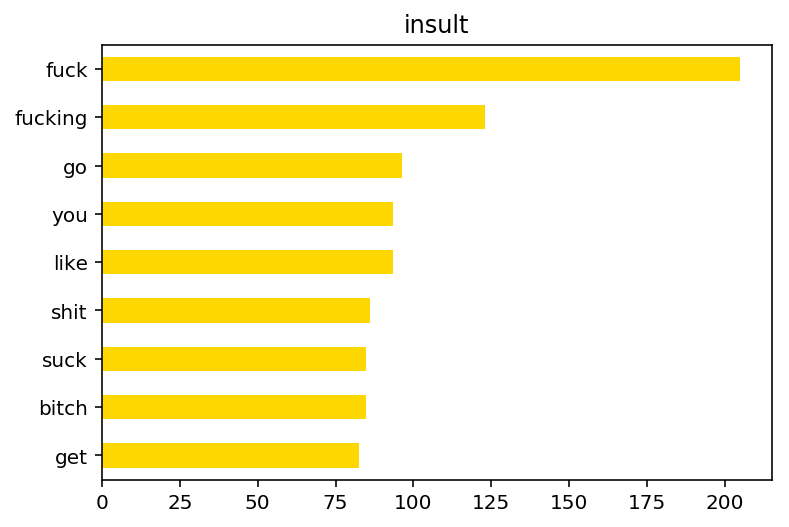

In [61]:
insult_only_tfidf.tail(9).plot(kind='barh',color='gold')
plt.title('insult')
plt.show()

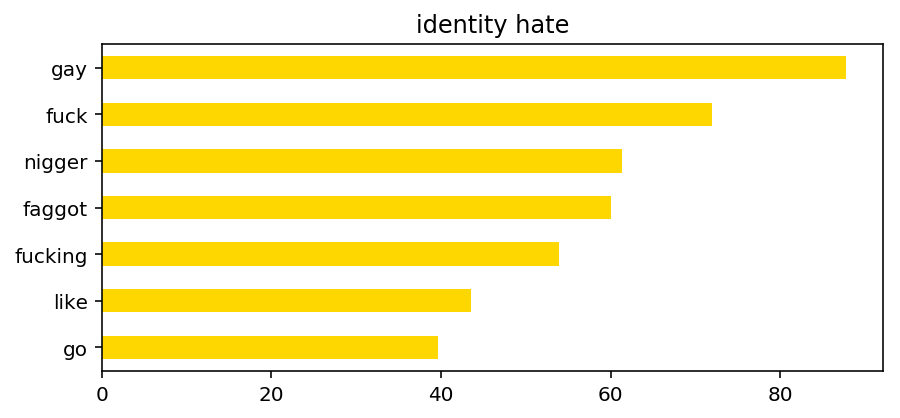

In [104]:
plt.figure(figsize=(7,3))
identity_hate_only_tfidf.tail(7).plot(kind='barh',color='gold')
plt.title('identity hate')
plt.show()

In [63]:
tfv2 = TfidfVectorizer(min_df=10,  max_features=30000, 
            strip_accents='unicode', analyzer='word',ngram_range=(2,2),
            use_idf=1,smooth_idf=1,sublinear_tf=1)

In [64]:
unigram = tfv2.fit_transform(toxic_only)
features = np.array(tfv2.get_feature_names())
temp_df = pd.DataFrame(unigram.todense(), columns=features)
toxic_only_tfidf2 = temp_df.sum().sort_values()

In [65]:
unigram = tfv2.fit_transform(severe_toxic_only)
features = np.array(tfv2.get_feature_names())
temp_df = pd.DataFrame(unigram.todense(), columns=features)
severe_toxic_only_tfidf2 = temp_df.sum().sort_values()

In [66]:
unigram = tfv2.fit_transform(obscene_only)
features = np.array(tfv2.get_feature_names())
temp_df = pd.DataFrame(unigram.todense(), columns=features)
obscene_only_tfidf2 = temp_df.sum().sort_values()

In [67]:
unigram = tfv2.fit_transform(threat_only)
features = np.array(tfv2.get_feature_names())
temp_df = pd.DataFrame(unigram.todense(), columns=features)
threat_only_tfidf2 = temp_df.sum().sort_values()

In [68]:
unigram = tfv2.fit_transform(insult_only)
features = np.array(tfv2.get_feature_names())
temp_df = pd.DataFrame(unigram.todense(), columns=features)
insult_only_tfidf2 = temp_df.sum().sort_values()

In [69]:
unigram = tfv2.fit_transform(identity_hate_only)
features = np.array(tfv2.get_feature_names())
temp_df = pd.DataFrame(unigram.todense(), columns=features)
identity_hate_only_tfidf2 = temp_df.sum().sort_values()

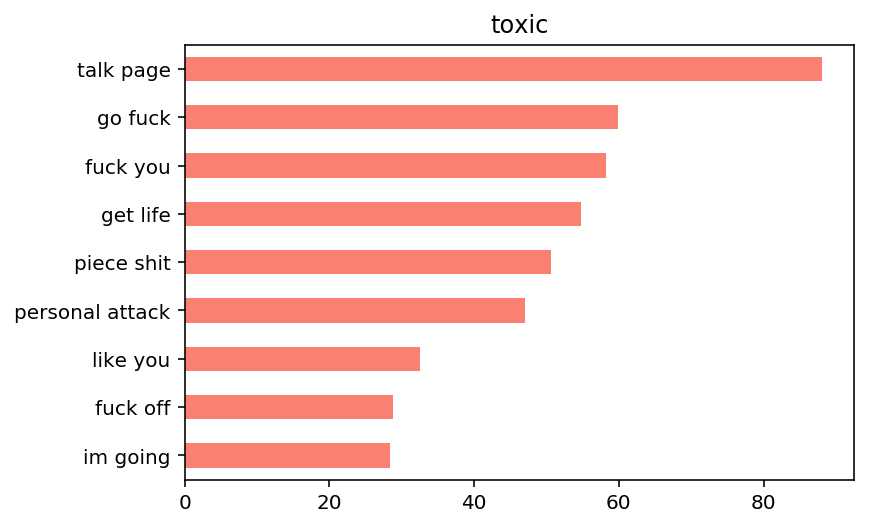

In [70]:
toxic_only_tfidf2.tail(9).plot(kind='barh',color='salmon')
plt.title('toxic')
plt.show()

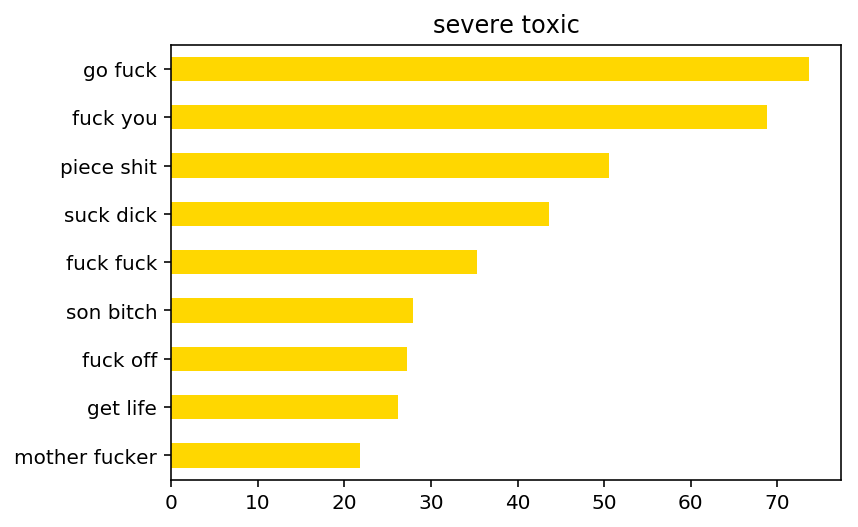

In [71]:
severe_toxic_only_tfidf2.tail(9).plot(kind='barh',color='gold')
plt.title('severe toxic')
plt.show()

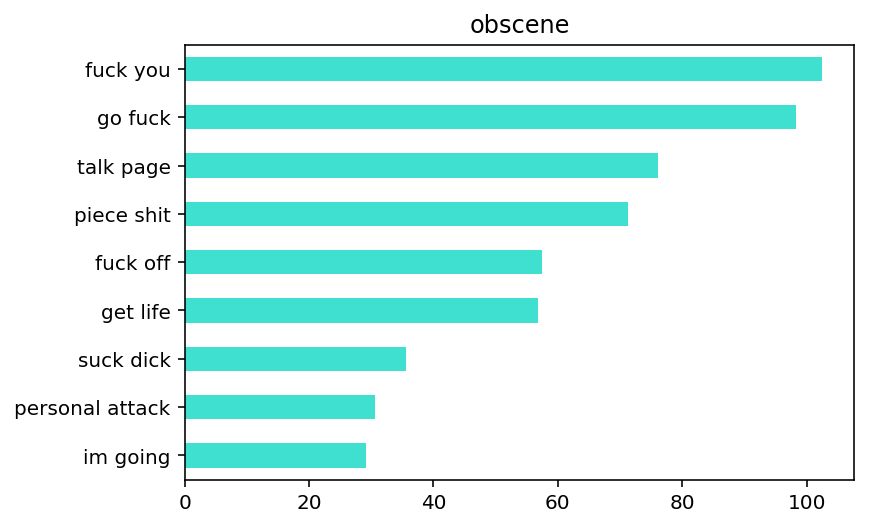

In [72]:
obscene_only_tfidf2.tail(9).plot(kind='barh',color='turquoise')
plt.title('obscene')
plt.show()

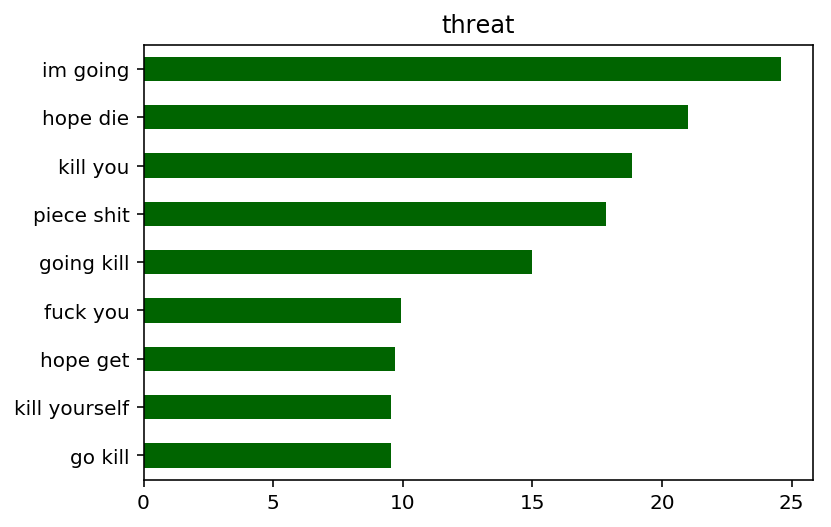

In [94]:
threat_only_tfidf2.tail(9).plot(kind='barh',color='darkgreen')
plt.title('threat')
plt.show()

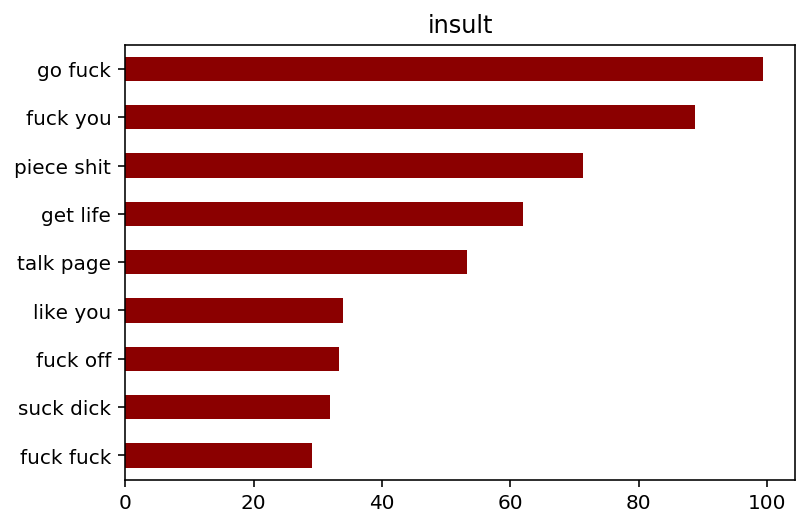

In [95]:
insult_only_tfidf2.tail(9).plot(kind='barh',color='darkred')
plt.title('insult')
plt.show()

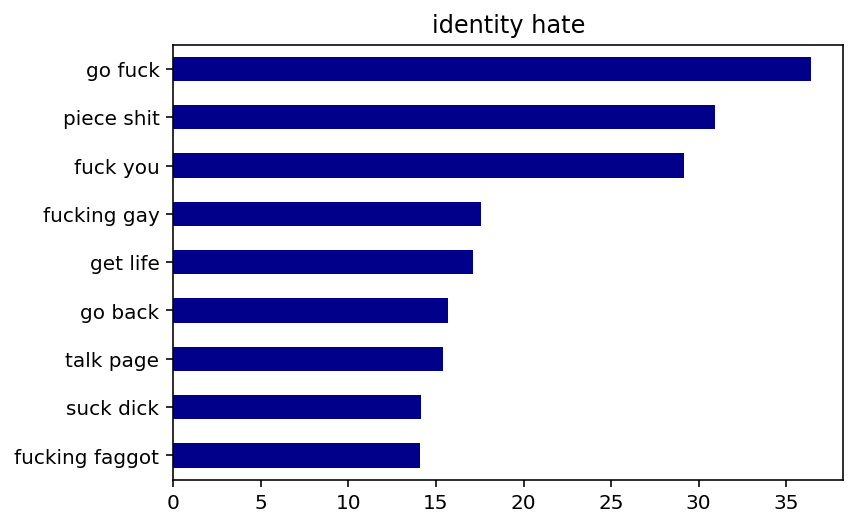

In [75]:
identity_hate_only_tfidf2.tail(9).plot(kind='barh',color='darkblue')
plt.title('identity hate')
plt.show()